In [1]:
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline 

In [2]:
data = pd.read_csv('data_lessons/hw_aa.csv', sep = ';')

In [3]:
data.head()

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


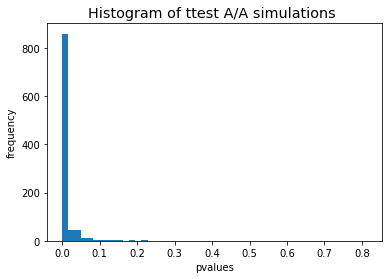

0.948

In [4]:
#p-value должен получиться меньше 0.05
n = 100000
simulations = 1000
n_s = 1000
res = []


# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = data[(data['experimentVariant'] == 1)]['purchase'].sample(n_s, replace = False).values
    s2 = data[(data['experimentVariant'] == 0)]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [5]:
#общие настройки графика
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [6]:
#посмотрим на среднее в разрезе версий
data.groupby(['version']).agg({'purchase':'mean'})

,purchase
version,
v2.8.0,0.023372
v2.9.0,0.072973
v3.7.4.0,0.061484
v3.8.0.0,0.060319


In [7]:
#проверим распределение каждой из групп
print(stats.shapiro(data[data['version'] == 'v2.8.0']['purchase'].sample(1000, random_state=17)))
print(stats.shapiro(data[data['version'] == 'v2.9.0']['purchase'].sample(1000, random_state=17)))
print(stats.shapiro(data[data['version'] == 'v3.7.4.0']['purchase'].sample(1000, random_state=17)))
print(stats.shapiro(data[data['version'] == 'v3.8.0.0']['purchase'].sample(1000, random_state=17)))

#распределение не нормальное (p-v < 0.05)

(0.12385976314544678, 0.0)
(0.27437031269073486, 0.0)
(0.24883735179901123, 0.0)
(0.2541196942329407, 0.0)


In [ ]:
#проверим стат значимость в отклонении средних